In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [27]:
BGL=pd.read_csv("/kaggle/input/unsupervised-tfidf/BGL_all_params.csv")

In [45]:
Thunder=pd.read_csv('/kaggle/input/unsupervised-tfidf/Thunderbird_all_params.csv')

In [ ]:
# Calculate the proportions of anomalies and normal points per cluster
for cluster in range(max(cluster_labels) + 1):
    cluster_mask = np.array(cluster_labels) == cluster
        anomaly_count = np.sum(np.array(anomaly_labels)[cluster_mask] == 1)
        normal_count = cluster_counts[cluster] - anomaly_count
        total_count = cluster_counts[cluster]

In [42]:
def plot_proportions(df,cluster_col,label_col,data):
    
    cluster_labels=df[cluster_col].values
    anomaly_labels=df[label_col].values
    
    # Count the occurrences of each cluster
    cluster_counts = np.bincount(cluster_labels)

    # Initialize lists to store the proportions
    anomaly_proportions = []
    normal_proportions = []

    # Calculate the proportions of anomalies and normal points per cluster
    for cluster in range(max(cluster_labels) + 1):
        cluster_mask = np.array(cluster_labels) == cluster
        anomaly_count = np.sum(np.array(anomaly_labels)[cluster_mask] == 1)
        normal_count = cluster_counts[cluster] - anomaly_count
        total_count = cluster_counts[cluster]

        anomaly_proportion = anomaly_count / total_count
        normal_proportion = normal_count / total_count

        anomaly_proportions.append(anomaly_proportion)
        normal_proportions.append(normal_proportion)

    plt.figure(figsize=(8, 4))
    # Plot the stacked bar chart with grey and red colors, wider bars, and labels 
    #for all x-values
    clusters = range(max(cluster_labels) + 1)
    plt.bar(clusters, anomaly_proportions, color='#ff474c', label='Anomalies', width=0.9)
    plt.bar(clusters, normal_proportions, bottom=anomaly_proportions, color='#D3D3D3',
        label='Normal', width=0.9)

    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.title('Proportion of Anomalous Logs to Normal Logs per Cluster in {}'.format(data))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Move the legend outside the plot

    # Label all x-values
    plt.xticks(clusters)

    return plt.show()

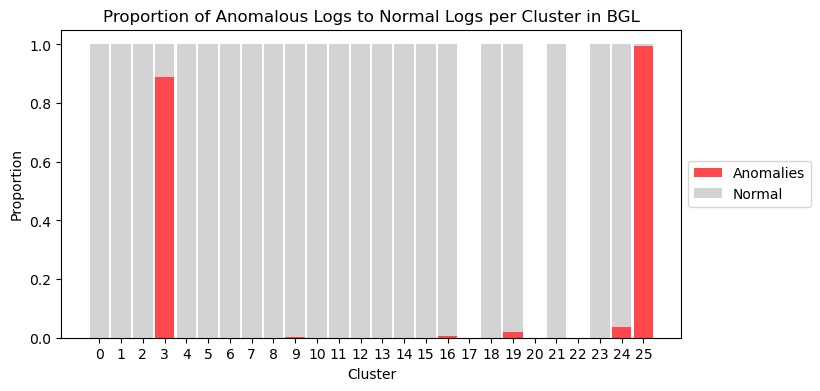

In [48]:
df= BGL
cluster_col='clusters'
label_col='label'
data="BGL"
plot_proportions(df,cluster_col,label_col,data)

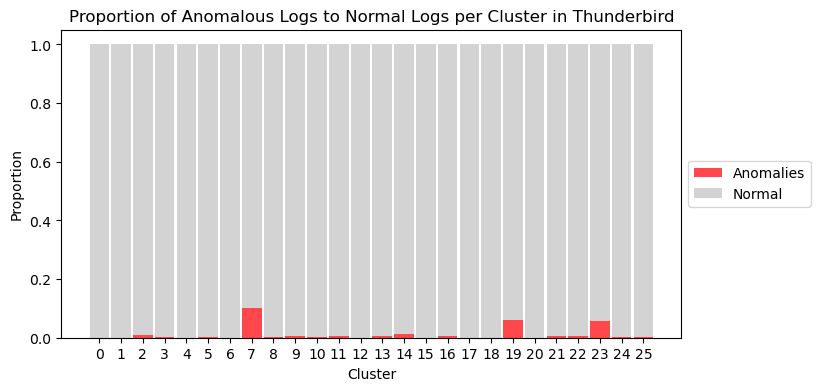

In [46]:
df= Thunder
cluster_col='clusters'
label_col='label'
data="Thunderbird"
plot_proportions(df,cluster_col,label_col,data)